In [1]:
%matplotlib inline

In [13]:
import sklearn
import nose
import astroML_addons
import astroML
import scipy
import pandas
import xdgmm
from astropy.io import fits
import csv
import os
from shutil import copyfile
import numpy as np
import matplotlib.pyplot as plt
import requests
import ast

import warnings
warnings.filterwarnings('ignore')

def fetchValsByEpoch(epoch, directorystr):
    
    deltaW = []
    sigW = []
    w1 = []
    w2 = []
    w1s = []
    w2s = []
    mjd = []
    name = []
    

    #directorystr = './csvfiles/galaxy_csvfiles-150318/'
    directory = os.fsencode(directorystr)
    filelist = os.listdir(directory)
    print(len(filelist))
    readdata = np.zeros((22,len(filelist)+1)) #one big list to rule them all
    fileCount = 0 #to keep our place in each list as we go through the files
    blankCount = 0
    for file in filelist:
        filestr = os.fsdecode(file)
        if(filestr.endswith(".csv")):
            readfile = open(directorystr+filestr, 'r')
            #name.append(filestr)
            reader = csv.reader(readfile)
            typeIndex = 0 #to iterate through the w1, w2, etc list
            nullCount = 0
            rowCount = 0
            
            for row in enumerate(reader):
                if rowCount < 5 or rowCount >= 14:
                    if rowCount == 0 and row[1][1] == "null|":
                        #print("Empty csv")
                        nullCount = nullCount + 1 #skip this file
                    rowCount = rowCount + 1
                    continue #skip the first and last rows
                try:
                    entry = row[1][epoch]
                except IndexError:
                    rowCount = rowCount + 1
                    continue
                try:
                    fentry = float(entry)
                    readdata[typeIndex][fileCount] = fentry
                except ValueError:
                    if entry != 'null': #this is a label; skip it
                        #print("String!")
                        #print(entry)
                        rowCount = rowCount + 1 #keep track of where we are in the file
                        continue #skip to next row, do not increment readdata row
                    else: #this file isn't useful
                        readdata[typeIndex][fileCount] = 99
                        nullCount = nullCount + 1 #this is a null in W1 or W2. don't want this file
                rowCount = rowCount + 1 #move on to the next row in the file
                typeIndex = typeIndex + 1 #move to next row in the data array
            if nullCount == 0:
                fileCount = fileCount + 1 #overwrite if we found null in W1, W2.
                name.append(filestr)
                
                    #break
                
    print("Error count: " + str(blankCount))    
    w1 = [round(float(x), 4) for x in readdata[1]]
    #print(w1)
    w2 = [round(float(x), 4) for x in readdata[3]]
    #print("w2")
    #print(w2)
    w1s = [round(float(x), 4) for x in readdata[2]]
    #print(w1s)
    w2s = [round(float(x), 4) for x in readdata[4]]
    #print(w2s)
    mjd = [float(x) for x in readdata[0]]
    #print(mjd)
    #print("Length of w1: " + str(len(w1)))
    #print(name)
   
    
    deltaW = [x - y for x,y in zip(w1,w2)]
    sigW = [np.sqrt(sx**2 + sy**2) for sx,sy in zip(w1s, w2s)]
    
    
    
    #print("deltaW")
    #print(len(deltaW))
    #print(deltaW)
    
    notNullCount = 0
    for val in w1:
        if val != 0:
            notNullCount = notNullCount + 1
    deltaW = deltaW[:notNullCount]
    sigW = sigW[:notNullCount] #trim the array of the extra length
    print("deltaW length" + str(len(deltaW)))
    print("name length" + str(len(name)))

    return deltaW, sigW, notNullCount, name, mjd

In [14]:
print("starting")
result = fetchValsByEpoch(0, "./csvfiles/quasars/")
deltaW = result[0]
sigW = result[1]
npoints = result[2]
print(deltaW)
# print(sigW)
# print(npoints)



param_range = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
deltaW = np.array(deltaW)

deltaW = deltaW.reshape(deltaW.shape[0], 1)
#print(deltaW.shape)
sigW = np.array(sigW)

sigW = sigW.reshape(sigW.shape[0], 1,1)
#print(sigW.shape)

print("done")



starting
99989
Error count: 0
deltaW length49045
name length49044
[0.6020000000000003, 0.47300000000000075, 0.9770000000000003, 0.7230000000000008, 1.311, 1.3359999999999985, 0.16699999999999982, 0.645999999999999, 1.0169999999999995, 0.8699999999999992, 0.9339999999999993, 0.827, 0.8300000000000001, 1.302999999999999, 0.9420000000000002, 1.8059999999999992, 0.26699999999999946, 0.9429999999999996, 1.3480000000000008, 0.8040000000000003, 0.07099999999999973, 1.383000000000001, 0.9469999999999992, 1.2390000000000008, -0.07099999999999973, 1.6370000000000005, 1.0909999999999993, 1.3350000000000009, 0.25900000000000034, 2.087999999999999, 0.9290000000000003, 1.811, -0.39000000000000057, 1.1600000000000001, 1.6580000000000013, 0.9949999999999992, 0.25900000000000034, 0.875, 1.1239999999999988, 1.1419999999999995, 1.077, 1.3710000000000004, 0.8659999999999997, 1.1839999999999993, 0.9550000000000001, 1.4740000000000002, 0.8559999999999999, 0.8570000000000011, 1.0870000000000015, 1.4580000000

In [ ]:
print("starting")

xdgmm = xdgmm.XDGMM()

bic, optimal_n_comp, lowest_bic = xdgmm.bic_test(deltaW, sigW, param_range)

print('done')

starting
N = 1 , BIC = 69245.0902275
N = 2 , BIC = 68552.4724307
N = 3 , BIC = 68477.5025805
N = 4 , BIC = 68439.8394482


In [7]:
import datetime
#print(datetime.datetime.now().strftime("%Y-%m-%d"))
datestr = datetime.datetime.now().strftime("%Y-%m-%d")

print("starting")
xdgmm.n_components = optimal_n_comp
xdgmm = xdgmm.fit(deltaW, sigW)
print('done')

xdgmm.save_model('galaxyModel'+datestr+'.fit')

starting
done


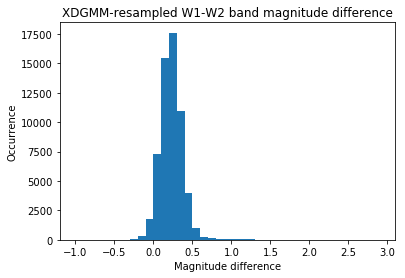

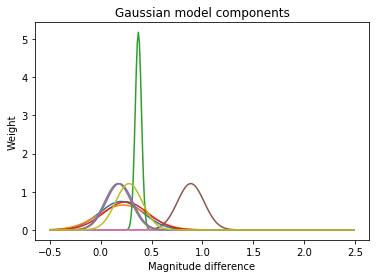

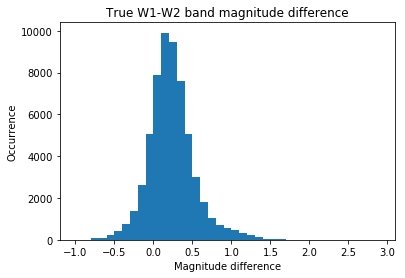

In [10]:
%matplotlib inline


import sklearn
import nose
import astroML_addons
import astroML
import scipy
import pandas
import xdgmm
from astropy.io import fits
import csv
import os
from shutil import copyfile
import numpy as np
import matplotlib.pyplot as plt

#from demo_plots import *

import requests
import ast

import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan)

xdgmm = xdgmm.XDGMM(filename='galaxyModel'+datestr+'.fit')         
    
def makeGaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))/(2.0*np.pi*sig)

binwidth = 0.1

sample = xdgmm.sample(npoints)
plt.figure()
h1 = plt.hist(sample, bins=np.arange(-1, 3, binwidth))
plt.title('XDGMM-resampled W1-W2 band magnitude difference')
plt.xlabel('Magnitude difference')
plt.ylabel('Occurrence')



plt.figure()

#for mu, alpha in xdgmm.mu, xdgmm.weights:
x = np.arange(-0.5, 2.5, 0.01)
plt.plot(x, makeGaussian(x, xdgmm.mu[0], xdgmm.weights[0]))
plt.plot(x, makeGaussian(x, xdgmm.mu[1], xdgmm.weights[1]))
plt.plot(x, makeGaussian(x, xdgmm.mu[2], xdgmm.weights[2]))
plt.plot(x, makeGaussian(x, xdgmm.mu[3], xdgmm.weights[3]))
plt.plot(x, makeGaussian(x, xdgmm.mu[4], xdgmm.weights[4]))
plt.plot(x, makeGaussian(x, xdgmm.mu[5], xdgmm.weights[4]))
plt.plot(x, makeGaussian(x, xdgmm.mu[6], xdgmm.weights[4]))
plt.plot(x, makeGaussian(x, xdgmm.mu[7], xdgmm.weights[4]))
plt.plot(x, makeGaussian(x, xdgmm.mu[8], xdgmm.weights[4]))
plt.title('Gaussian model components')
plt.xlabel('Magnitude difference')
plt.ylabel('Weight')

#print(deltaW)

plt.figure()

plt.hist(deltaW, bins=np.arange(-1, 3, binwidth))
plt.title('True W1-W2 band magnitude difference')
plt.xlabel('Magnitude difference')
plt.ylabel('Occurrence')


In [82]:

tryProp = xdgmm.score_samples(1.5, 0.03)

TypeError: 'float' object is not subscriptable